In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df=pd.read_csv('Add_sales_data_2018.csv')
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

           For that, we need to check the correlation between profit and amount spent for advertising through five different companies. 

<AxesSubplot:>

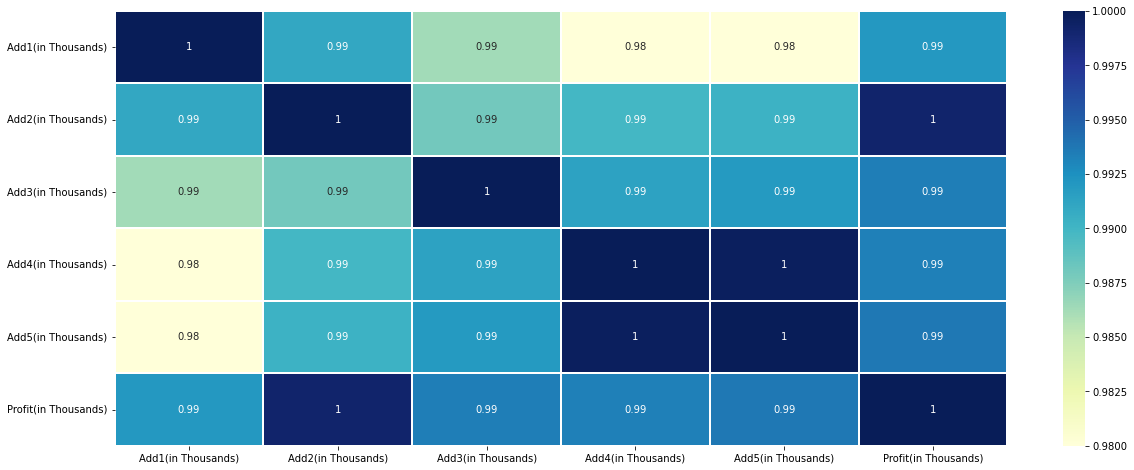

In [58]:
corrmatrix = df.corr()
plt.subplots(figsize = (20,8))
sns.heatmap(corrmatrix, vmin=0.98, vmax=1, annot=True, linewidth = 0.2, cmap='YlGnBu')

    Here, correlation coefficients between profit and amount spent for ad through five different companies are 0.99,1,0.99,0.99 and 0.99. That means, amount spent on company 2 is highly profitable. And the others are also highly prifitable.

# 2. Build a regression model to predict the profit from the given data and  comment your findings on it.

In [59]:
#Separating predicytion variables(X) and response variable(Y)

In [60]:
X = df.drop(['Profit(in Thousands)','Date'], axis=1)
X

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,208.00,222.25,206.85,216.00,215.15
1,217.00,218.60,205.90,210.25,209.20
2,223.50,227.80,216.15,217.25,218.20
3,230.00,237.50,225.75,226.45,227.60
4,234.55,234.60,221.05,230.30,230.90
...,...,...,...,...,...
200,288.00,288.25,279.20,284.50,284.30
201,290.00,292.50,282.20,284.80,284.45
202,298.60,298.60,286.65,287.45,287.80
203,290.00,299.55,285.90,297.85,298.35


In [61]:
Y = df[['Profit(in Thousands)']]
Y

,Profit(in Thousands)
0,4093.065
1,4042.448
2,4213.819
3,4391.665
4,4350.683
...,...
200,5374.105
201,5439.655
202,5545.013
203,5565.444


In [62]:
#Splitting test data and train data

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [64]:
#Building a Linear Regression Model

In [65]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [66]:
#Finding MSE and R square values for train data

In [67]:
Y_pred_train = model.predict(X_train)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Coefficients: [[ 1.   12.38  3.5   1.    0.9 ]]
Intercept: [-1.8189894e-12]
Mean squared error (MSE): 0.00
Coefficient of determination (R^2): 1.00


In [68]:
#Finding MSE and R square values for test data

In [69]:
Y_pred_test = model.predict(X_test)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Coefficients: [[ 1.   12.38  3.5   1.    0.9 ]]
Intercept: [-1.8189894e-12]
Mean squared error (MSE): 0.00
Coefficient of determination (R^2): 1.00


    Since my train data and test data give same MSE and R square value, I can say that linear regression fits this data.
    Also, since MSE=0.0, it's better.

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

In [106]:
data = {'Add1(in Thousands)':[290],'Add2(in Thousands)':[312],'Add3(in Thousands)':[309],'Add4(in Thousands)':[298],'Add5(in Thousands)':[320]}
pred_data = pd.DataFrame(data)
pred_data

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,290,312,309,298,320


In [107]:
pred_prof = model.predict(pred_data1)
print('Predicted profit for the given data is ', pred_prof)

Predicted profit for the given data is  [[5820.06]]
